# 과제1> epl 축수 선수들의 몸값에 영향을 주는 요인을 알아본다


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/데이터마이닝/EPL_Soccer_MLR_LR.csv',header=0)

In [3]:
data

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50


array([[<Axes: title={'center': 'DistanceCovered(InKms)'}>,
        <Axes: title={'center': 'Goals'}>,
        <Axes: title={'center': 'MinutestoGoalRatio'}>],
       [<Axes: title={'center': 'ShotsPerGame'}>,
        <Axes: title={'center': 'AgentCharges'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Cost'}>,
        <Axes: title={'center': 'PreviousClubCost'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Score'}>, <Axes: >]], dtype=object)

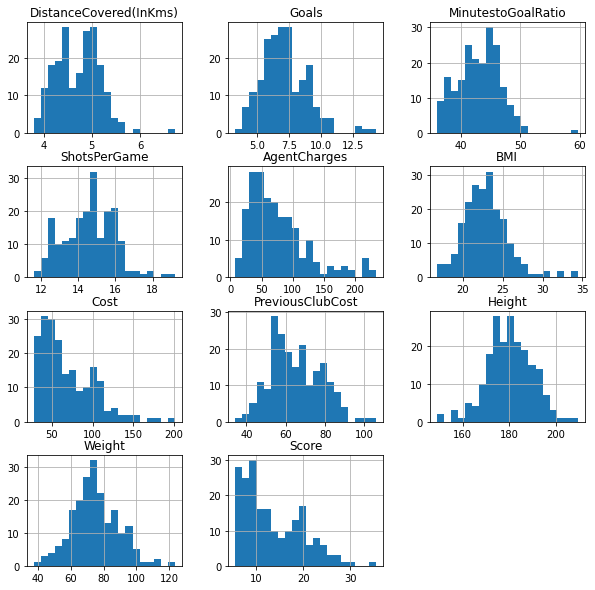

In [4]:
#data EDA

data.hist(bins=20, figsize=(10,10))

왜도가 심한 분포들과 각 분포들의 범위가 많이 차이나는 것을 알 수 있다

In [5]:
data.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


변수들에 변수변환을 취해도 되는지를 확인한다다

In [6]:
# x와 y설정
y = data.loc[:,['Cost']]
x = data.drop(columns=['PlayerName','Club','Cost'])

In [7]:
#왜도가 심한 변수들은 로그변수 변환을 통해 분포를 정규에 근사해준다
import numpy as np

lgc = np.log(x['AgentCharges'])
ls = np.log(x['Score'])
ly = np.log(y)

In [8]:
x['AgentCharges'] = lgc
x['Score'] =ls
y['Cost'] = ly

In [9]:
#분포들의 범위를 0-1로 바꿔준다
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[:]= scaler.fit_transform(x[:])
y[:]= scaler.fit_transform(y[:])


array([[<Axes: title={'center': 'DistanceCovered(InKms)'}>,
        <Axes: title={'center': 'Goals'}>,
        <Axes: title={'center': 'MinutestoGoalRatio'}>],
       [<Axes: title={'center': 'ShotsPerGame'}>,
        <Axes: title={'center': 'AgentCharges'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'PreviousClubCost'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

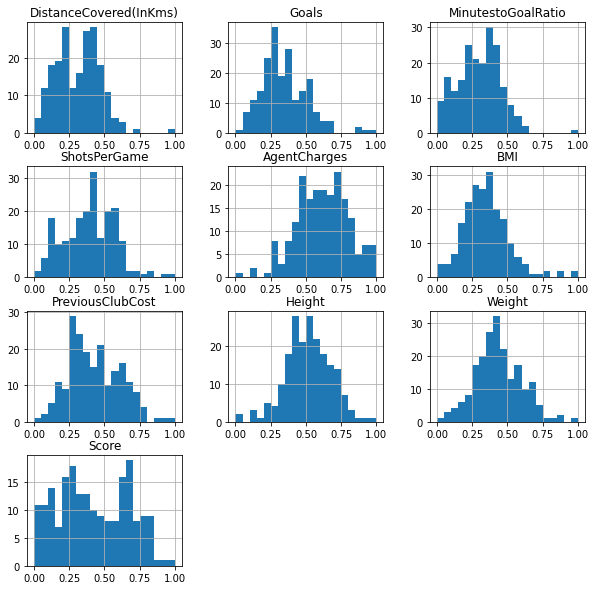

In [10]:
x.hist(bins=20, figsize=(10,10))

변수들의 분포가 정규분포에 근사된 것과 범위가 바뀐 것을 볼 수 있다.

In [11]:
import seaborn as sns
import numpy as np

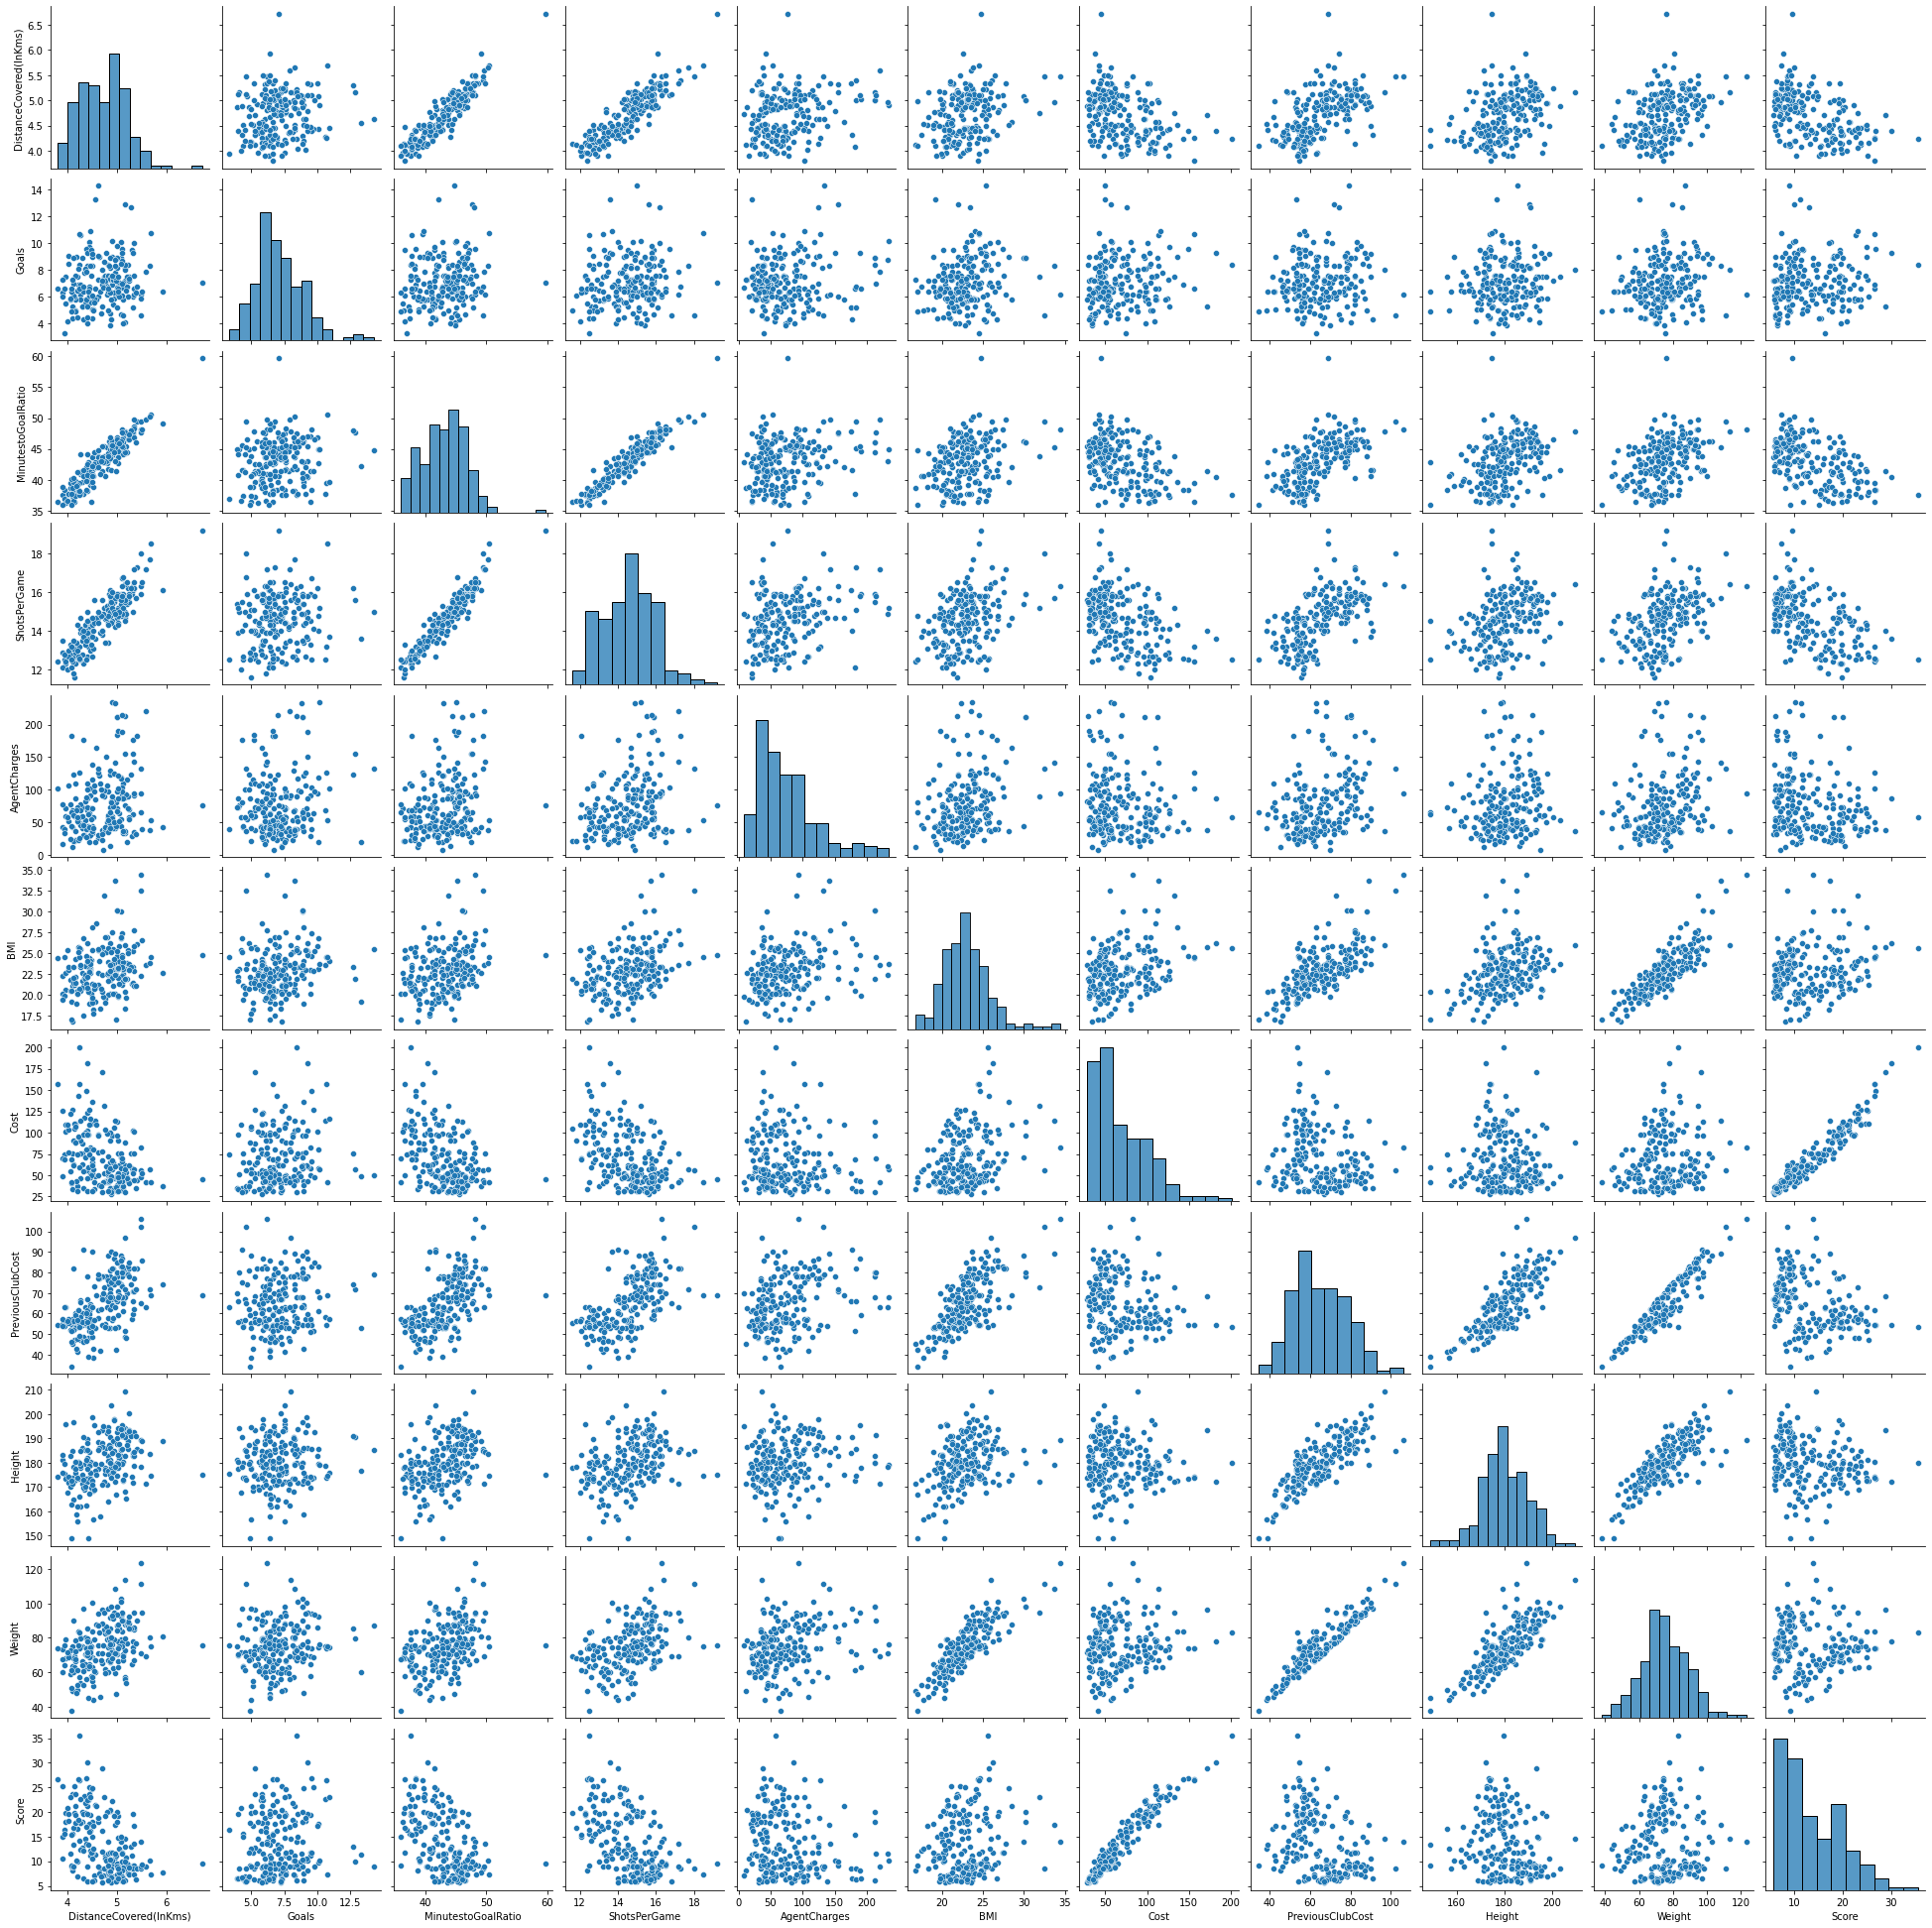

In [12]:
#x와 y간의 상관관계를 파악한다
sns.pairplot(data)

산점도를 보면 일부 독립변수들은 강한 양의 선형관계를를 갖는 것을 확인할 수 있어 다중공산성이 의심되므로 변수선택이 필요함을 나타낸다.

In [13]:
data.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


<ipython-input-14-72ef97a67cd4>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap='RdBu',


<Axes: >

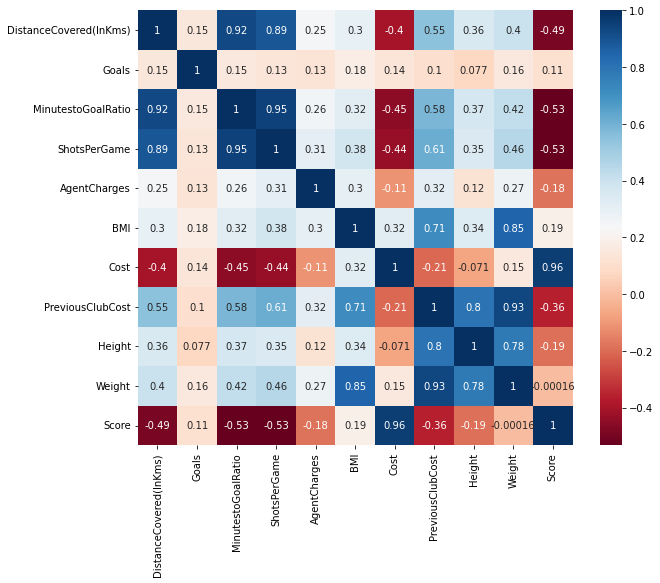

In [14]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap='RdBu',
            square=True, ax=ax)

산점도에서 이미 확인했듯 몇몇 독립변수들간의 강한 선형성이 보여진다

In [15]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame([variance_inflation_factor(x.iloc[:,0:].values, i) for i in range(x.iloc[:,:10].shape[1])], index = x.iloc[:,:10].columns)
vif.reset_index(inplace = True)
vif.columns = ['Feature', 'VIFscore']
vif

,Feature,VIFscore
0,DistanceCovered(InKms),35.239102
1,Goals,5.997292
2,MinutestoGoalRatio,77.196099
3,ShotsPerGame,70.122381
4,AgentCharges,13.228484
5,BMI,215.621758
6,PreviousClubCost,499.826389
7,Height,248.069085
8,Weight,815.588013
9,Score,35.957326


VIF를 확인한 결과 예상한 바와 같이 대부분의 변수들의 VIF가 10보다 크므로로 변수들간 강한 선형관계가 있는 것을 알 수 있다.

In [16]:
# Train: Test = 8:2 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=312)

변수선택

In [17]:
#전진선택법
import statsmodels.api as sm

feature_names = x.columns
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1 # selection level 기준값
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(feature_names) > 0:
    remainder = list(set(feature_names) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = x_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y_train,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_train,sm.add_constant(x_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-17-a388c29ca2bf>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-17-a388c29ca2bf>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-17-a388c29ca2bf>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-17-a388c29ca2bf>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value


In [18]:
selected_variables

['Score', 'Weight', 'PreviousClubCost']

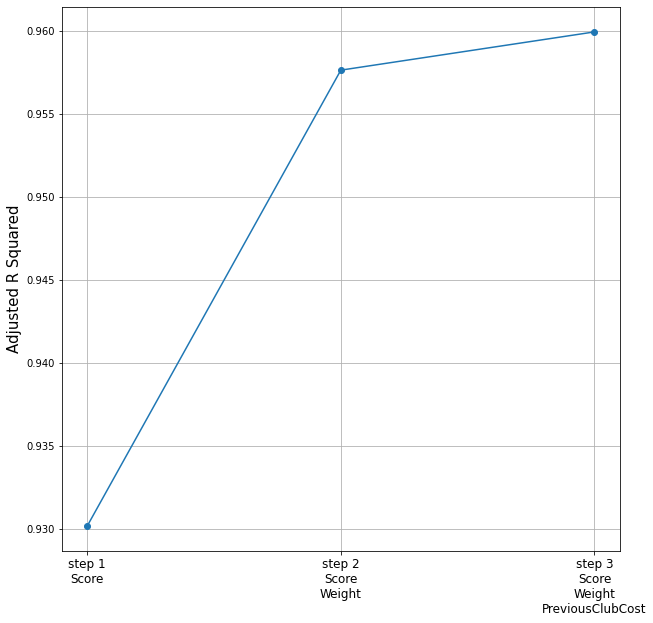

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

전진선택법을 진행한 결과 score,weight,previousclubcost가 선택되었고, 결정계수가0.96으로 설명력이 상당히 높음을 알 수 있다.

In [20]:
#후진소거법

selected_variables = list(feature_names) ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.1
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(selected_variables) > 0:
    X = sm.add_constant(x_train[selected_variables])
    p_vals = sm.OLS(y_train, X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_train, sm.add_constant(x_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

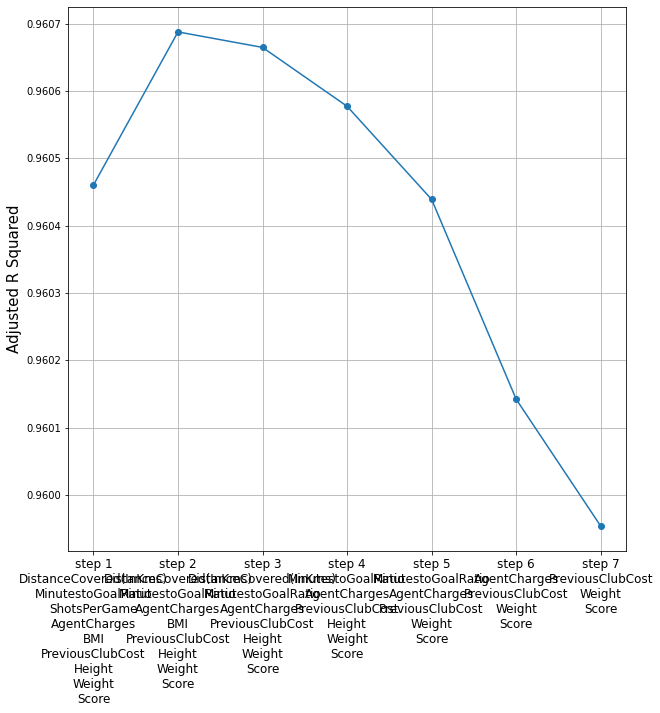

In [21]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

후진소거법을 진행한 결과, minutestogoalratio,agentcharges,previousclubcost,weight,score이 선택되었고 결정계수도 높은 것을 확인할 수 있다.

In [22]:
#단계별 선택법

selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(feature_names) > 0:
    remainder = list(set(feature_names) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = x_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y_train,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = x_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y_train,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_train,sm.add_constant(x_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-22-8d26e5564070>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-22-8d26e5564070>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-22-8d26e5564070>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-22-8d26e5564070>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value


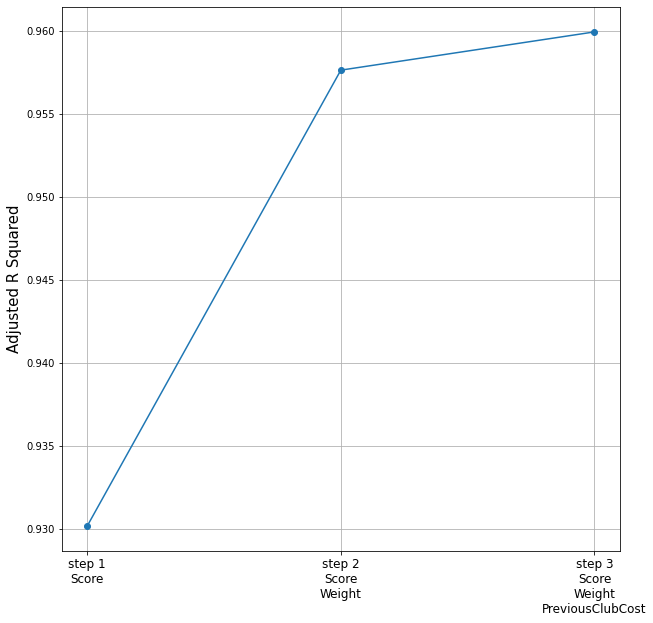

In [23]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

단계별 선택법의 결과로score,weight,previousclubcost가 선택되었음을 알 수 있다.

In [24]:
#ridge regression

from sklearn.linear_model import LinearRegression



#다중 선형 회귀를 이용한 성능 확인
lr = LinearRegression().fit(x_train, y_train)

# 기울기 파라미터(w)는 가중치/계수라고 하며 coef_속성에 저장됨
print("lr.coef_: {}".format(lr.coef_))

# 파라미터b는 편향/절편 값은 intercept_속성에 저장됨
print("lr.intercept_ : {}".format(lr.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(lr.score(x_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr.score(x_test,y_test)))


lr.coef_: [[ 0.07537369  0.00510094 -0.14922297  0.02821577  0.03942867  0.18894567
  -0.53670827  0.20847857  0.47322965  0.74465702]]
lr.intercept_ : [-0.07143618]
훈련 세트의 정확도 : 0.96
테스트 세트의 정확도 : 0.93


In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

x_train_ = sm.add_constant(x_train, has_constant='add') 
# Ridge Regression 모델 생성
ridge=Ridge()

# Grid Search를 위한 parameter 정의
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

# Ridge Regression 모델을 Grid SearchCV 로 fitting
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train_,y_train)

# Test set에 상수항(constant) 추가
x_test_ = sm.add_constant(x_test, has_constant='add')

# 예측값 계산
prediction_ridge=ridge_regressor.predict(x_test_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.07506e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.26135e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.93358e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.07949e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

In [26]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(ridge_regressor.best_estimator_.coef_)

{'alpha': 0.01}
-0.0022158912211000985
[[ 0.          0.07324354  0.00568939 -0.14636161  0.02460056  0.039942
   0.22176011 -0.42839982  0.23193519  0.31650749  0.77062643]]


y에 대해 설명력이 낮은 x의 계수값이 0에 가까워질 정도로 작아지는 것을 알 수 있다.
또, 알파값이 0.01일때 모형의 설명력이 가장 높음을 알 수 있다.

In [27]:
#LASSO

# Method 1) 

import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(x_train_,y_train)
fit_time = time.time() - start_time

results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(x_train_,y_train)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]

results.style.apply(highlight_min)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,AIC criterion,BIC criterion
alphas,,
0.223729,3302.413002,3302.413002
0.041140,-286.738014,-283.656610
0.031950,-366.103058,-359.940250
0.005496,-514.058277,-504.814064
0.005216,-512.776656,-500.451039
0.005007,-513.534194,-501.208577
0.003147,-518.796230,-506.470612
0.002297,-518.783467,-503.376446
0.001256,-520.312841,-501.824415


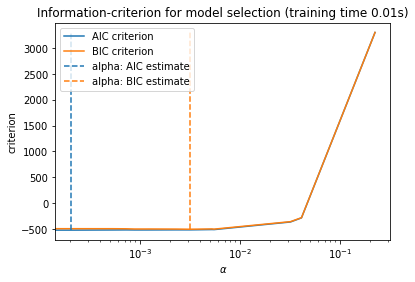

In [28]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

# Train set에 상수항(constant) 추가
x_train_ = sm.add_constant(x_train, has_constant='add')

# Lasso Regression 모델 생성
lasso=Lasso()

# Grid Search를 위한 parameter 정의
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

# Lasso Regression 모델을 Grid SearchCV 로 fitting
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train_,y_train)

# Test set에 상수항(constant) 추가
x_test_ = sm.add_constant(x_test, has_constant='add')

# 예측값 계산
prediction_lasso=lasso_regressor.predict(x_test_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e-01, tolerance: 6.529e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e-01, tolerance: 6.905e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e-01, tolerance: 7.097e-04

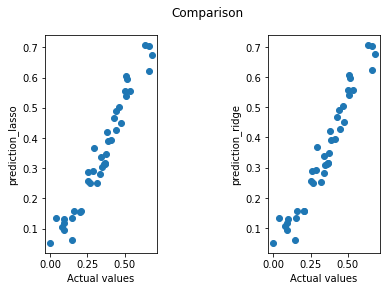

In [30]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Comparison')
axs[0].scatter(y_test, prediction_lasso)
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('prediction_lasso')
axs[1].scatter(y_test, prediction_ridge)
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('prediction_ridge')
plt.subplots_adjust(wspace=1)
plt.show()

In [31]:
#lasso method2
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
#model.score(X_train,y_train)



ridge_alpha = 0.01
lasso_alpha = 0.01

linear = LinearRegression()
ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha)

linear.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

linear_y_hat = linear.predict(x_test)
ridge_y_hat = ridge.predict(x_test)
lasso_y_hat = lasso.predict(x_test)

linear_r2, ridge_r2, lasso_r2 = r2_score(y_test,linear_y_hat), r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
linear_MSE, ridge_MSE, lasso_MSE = mean_squared_error(y_test,linear_y_hat), mean_squared_error(y_test,ridge_y_hat), mean_squared_error(y_test,lasso_y_hat)
linear_MAE, ridge_MAE, lasso_MAE = mean_absolute_error(y_test,linear_y_hat), mean_absolute_error(y_test,ridge_y_hat), mean_absolute_error(y_test,lasso_y_hat)

print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_r2, ridge_r2, lasso_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE))
print('MAE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MAE, ridge_MAE, lasso_MAE))

R2 score - Linear: 0.93, Ridge: 0.93, Lasso: 0.87
MSE - Linear: 0.00, Ridge: 0.00, Lasso: 0.00
MAE - Linear: 0.04, Ridge: 0.04, Lasso: 0.05


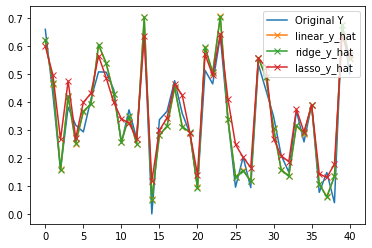

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

linear, ridge,lasso 모두 좋은 예측력을 갖고 있는 것으로 보이나, lasso보다는 linear와 ridge가 더 좋은 예측력을 갖고있는 것 같다

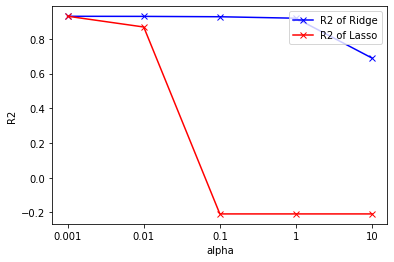

In [33]:
# Difference in prediction

ridge_result = []
lasso_result = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(x_train,y_train)
  lasso.fit(x_train,y_train)

  ridge_y_hat = ridge.predict(x_test)
  lasso_y_hat = lasso.predict(x_test)

  ridge_r2, lasso_r2 = r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
  ridge_result.append(ridge_r2)
  lasso_result.append(lasso_r2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5), ridge_result, '-x', c='blue', label="R2 of Ridge")
ax.plot(range(5), lasso_result, '-x', c='red', label="R2 of Lasso")
plt.xticks(range(5), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()


lasso와 ridge가 각각 어떤 알파값에서 제일 높은 정확도를 갖는지 나타낸다. lasso의 경우 0.1미만, ridge의 경우 1미만으로 보인다다

In [68]:
lasso_ = Lasso(alpha=0.01).fit(x,y)
print("사용한 인자의 수 : {}".format(np.sum(lasso_.coef_ != 0)))

사용한 인자의 수 : 1


In [69]:
x.iloc[:,lasso_.coef_!=0].columns

Index(['Score'], dtype='object')

lasso를 이용한 결과 변수 score을 제외한 다른 변수들의 계수는 0으로 선택되지 않았음을 알 수 있다.

카이제곱 독립성 검정을 이용하여 분석한 연령대별 성별과 사용중인 스마트폰 브랜드 비율 사이의 독립성 검정

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
from scipy.stats import chi2_contingency

In [63]:
# H0: 해당 연령대와 스마트폰사용 비율 간 관계가 없다
# H1: 해당 연령대와 스마트폰사용 비율 간 관계가 있다

#연령대 18~29세

df = pd.read_excel(io='/content/drive/MyDrive/데이터마이닝/data-1.xlsx',index_col="브랜드") #엑셀 데이터 데이터 프레임 형태로 불러오기
print(df)
chi2, p, dof, expected = chi2_contingency(df, correction=False) #카이제곱 독립성 검정 실행
print(f"The chi-square statistic is {chi2:.3f}. The p-value is {p:.6f}.") #결과 출력
if p < 0.05:
    print("Significant at p < .05")
else:
    print("Not significant at p < .05")

        남성 18~29세  여성 18~29세
브랜드                         
삼성 갤럭시         51         36
애플 아이폰         43         62
LG              3          2
기타              3          0
The chi-square statistic is 9.224. The p-value is 0.026453.
Significant at p < .05


In [60]:
#연령대 30대

df = pd.read_excel(io='/content/drive/MyDrive/데이터마이닝/data-2.xlsx',index_col="브랜드") #엑셀 데이터 데이터 프레임 형태로 불러오기
print(df)

chi2, p, dof, expected = chi2_contingency(df, correction=False)
print(f"The chi-square statistic is {chi2:.3f}. The p-value is {p:.6f}.")
if p < 0.05:
    print("Significant at p < .05")
else:
    print("Not significant at p < .05")

The chi-square statistic is 4.845. The p-value is 0.183495.
Not significant at p < .05


In [61]:
#연령대 40대

df = pd.read_excel(io='/content/drive/MyDrive/데이터마이닝/data-3.xlsx',index_col="브랜드") #엑셀 데이터 데이터 프레임 형태로 불러오기
print(df)

chi2, p, dof, expected = chi2_contingency(df, correction=False)
print(f"The chi-square statistic is {chi2:.3f}. The p-value is {p:.6f}.")
if p < 0.05:
    print("Significant at p < .05")
else:
    print("Not significant at p < .05")

The chi-square statistic is 5.289. The p-value is 0.151798.
Not significant at p < .05


In [62]:
#연령대 50대

df = pd.read_excel(io='/content/drive/MyDrive/데이터마이닝/data-4.xlsx',index_col="브랜드") #엑셀 데이터 데이터 프레임 형태로 불러오기
print(df)

chi2, p, dof, expected = chi2_contingency(df, correction=False)
print(f"The chi-square statistic is {chi2:.3f}. The p-value is {p:.6f}.")
if p < 0.05:
    print("Significant at p < .05")
else:
    print("Not significant at p < .05")

The chi-square statistic is 1.333. The p-value is 0.721314.
Not significant at p < .05


모든 연령대에 대해 분석 결과 p-value가 0.05보다 작아 귀무가설을 기각한다. 즉, 모든연령대에서 성별과 스마트폰 브랜드간의 관계는 있다. 